In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The returns for the European, Australian and Japanese assets must be adjusted for the currency returns in EUR, AUD, JPY.

In [23]:
# European assets
# 1.  MSE
# 2. IEAC
eur_ret = pd.read_csv('../database/return_samples/EUR.txt')
mse_ret = pd.read_csv('../database/return_samples/MSE.txt')
ieac_ret = pd.read_csv('../database/return_samples/IEAC.txt')

mse_ret = np.exp(mse_ret + eur_ret) - 1
ieac_ret = np.exp(ieac_ret + eur_ret) - 1

In [24]:
# Australian assets
# 1. VAX
aud_ret = pd.read_csv('../database/return_samples/AUD.txt')
vax_ret = pd.read_csv('../database/return_samples/VAS.txt')

vax_ret = np.exp(vax_ret + aud_ret) - 1

In [25]:
# Japanese assets
# 1. 1321.T
jpy_ret = pd.read_csv('../database/return_samples/JPY.txt')
_1321_ret = pd.read_csv('../database/return_samples/1321.txt')

_1321_ret = np.exp(_1321_ret + jpy_ret) - 1

In [26]:
# American assets
# 1. IVV
# 2. LQD
# 3. HYG
# 4. GLD

ivv_ret = np.exp(pd.read_csv('../database/return_samples/IVV.txt')) - 1
lqd_ret = np.exp(pd.read_csv('../database/return_samples/LQD.txt')) - 1
hyg_ret = np.exp(pd.read_csv('../database/return_samples/HYG.txt')) - 1
gld_ret = np.exp(pd.read_csv('../database/return_samples/GLD.txt')) - 1

The portfolio is equally weighted: $\omega_i = \frac{1}{n}$, with the adjusted portfolio returns we obtain the portfolio return by a simple inner product.

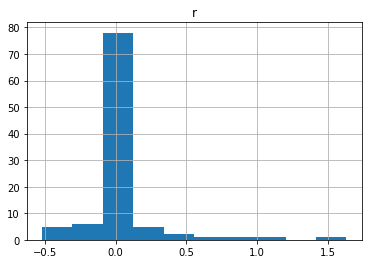

In [33]:
eq_weight  = 1/8
port_ret = 1/8 * (ivv_ret + lqd_ret + hyg_ret + gld_ret + mse_ret + ieac_ret + vax_ret + _1321_ret)
port_ret.hist()
plt.show()

Using the RiskUtils we can obtain a risk assessment of this portfolio.

In [35]:
from risk_utils.risk_utils import RiskAssessor
ra = RiskAssessor(np.array(port_ret))

In [36]:
ra.risk_summary()

======== RISK ASSESSMENT ========
VaR95 0.29782313696598856,    ES95 0.35756726946156114
VaR99 0.3229027628681832,     ES99 0.5201658395570046
EVT VaR99 0.3787900573220511, EVT ES99 0.5231983506858939


/Users/axelnilsson/Desktop/Abacus/risk_utils/risk_utils.py:133: RuntimeWarning: invalid value encountered in log
  return n_observations * np.log(params[1]) + (1 + 1 / params[0]) * log_likelihood
/Users/axelnilsson/Desktop/Abacus/risk_utils/risk_utils.py:131: RuntimeWarning: invalid value encountered in log
  log_likelihood = log_likelihood + np.log(1 + params[0] / params[1] * obs)
